# Canny Edge Detection with OpenCV

**Google Colab**에서 OpenCV의 **Canny 에지 검출** 함수를 실습하기 위한 자료입니다.

## 목차
1. **이론**: Canny 알고리즘 (4단계)
2. **Colab 준비**: 라이브러리 설치
3. **이미지 로드 & Canny** 적용
4. **임계값 파라미터** 변경 실험 (minVal, maxVal)
5. **추가 실습**: GUI Trackbar (로컬환경) / 대안 (Colab)
6. **과제**
7. **Q&A**


# 1. 이론: Canny 알고리즘
Canny 에지 검출은 다음 **4단계**로 이루어집니다:

1. **노이즈 제거**: 5×5 가우시안 필터로 블러링
2. **그라디언트(Gradient) 계산**: Sobel 연산자로 $G_x, G_y$ → Magnitude & Direction
3. **Non-maximum Suppression(비최대 억제)**: 주변 픽셀과 비교해 지역 최대값이 아니면 0(에지 아님)
4. **Hysteresis Threshold**(히스테리시스 임계값):
   - 두 개의 임계값(minVal, maxVal)
   - gradient가 **maxVal**보다 큰 픽셀은 "강한 에지"
   - gradient가 **minVal**보다 작은 픽셀은 "에지 아님"
   - 중간 구간에 있으면, 강한 에지와 연결되어 있을 때만 에지로 결정.

결과적으로, 노이즈가 제거되고, 얇고 선명한 에지(Edge) 결과를 얻을 수 있습니다.

### OpenCV의 `cv.Canny`
```python
edges = cv.Canny(image, minVal, maxVal, apertureSize=3, L2gradient=False)
```
- `image`: 그레이스케일 입력
- `minVal, maxVal`: 히스테리시스 임계값
- `apertureSize`: Sobel 커널 크기 (기본 3)
- `L2gradient`: True이면 $$\sqrt{G_x^2 + G_y^2}$$, False이면 |Gx| + |Gy|


# 2. Colab 준비: 라이브러리 설치

In [ ]:
!pip install opencv-python numpy matplotlib --quiet
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
print("OpenCV version:", cv.__version__)

OpenCV version: 4.10.0


아래 셀은 예제 이미지를 가져옵니다(`messi5.jpg` 등). 원본 OpenCV 예제 이미지나, 사용자가 원하는 이미지를 **업로드**해서 변경 가능합니다.

In [ ]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg
import os
if not os.path.exists('messi5.jpg'):
    print("messi5.jpg download failed. Please upload your own image.")
else:
    print("messi5.jpg downloaded.")

messi5.jpg downloaded.


# 3. 이미지 로드 & Canny 적용

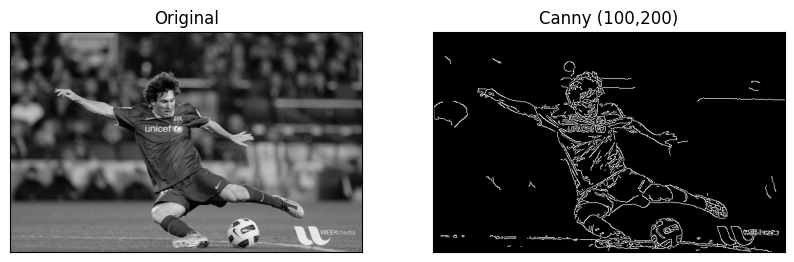

In [ ]:
img_path = 'messi5.jpg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found. Upload or change path.")

edges = cv.Canny(img, 100, 200)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray')
plt.title('Original'); plt.xticks([]); plt.yticks([])
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray')
plt.title('Canny (100,200)'); plt.xticks([]); plt.yticks([])
plt.show()

# 4. 임계값 파라미터 (minVal, maxVal) 변경 실험
Colab에서는 GUI Trackbar를 직접 사용하기 어렵지만, 아래 코드처럼 임계값을 수동으로 바꿔가며 실험 가능.

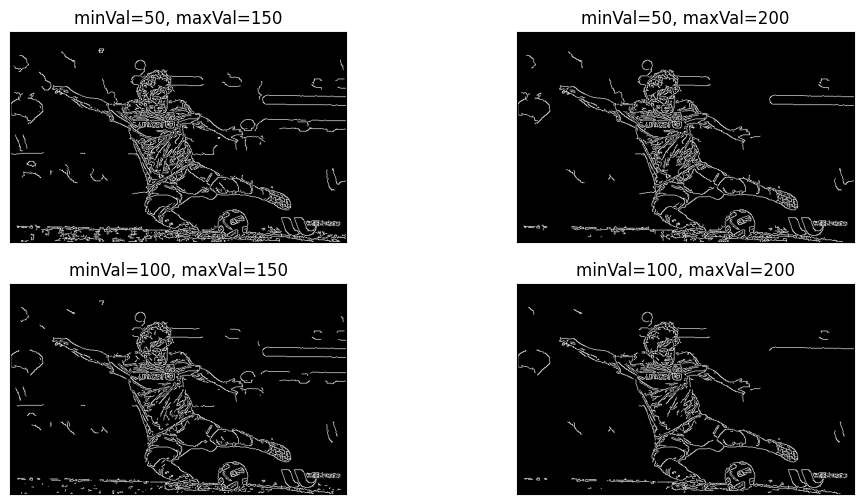

In [ ]:
def canny_test(img, minVal_list, maxVal_list):
    plt.figure(figsize=(12, len(minVal_list)*3))
    idx=1
    for minV in minVal_list:
        for maxV in maxVal_list:
            edges_ = cv.Canny(img, minV, maxV)
            plt.subplot(len(minVal_list), len(maxVal_list), idx)
            plt.imshow(edges_, cmap='gray')
            plt.title(f"minVal={minV}, maxVal={maxV}")
            plt.xticks([]); plt.yticks([])
            idx+=1
    plt.show()

if img is not None:
    min_vals = [50, 100]
    max_vals = [150, 200]
    canny_test(img, min_vals, max_vals)

# 5. 추가 실습: GUI Trackbar
**Colab**에서는 직접 Trackbar GUI가 제한적이므로,
- **로컬 환경**(Jupyter notebook or python script + `cv2.namedWindow`)에서 아래와 같이 구현 가능.
- Colab에서는 대안적으로 [ipywidgets](https://ipywidgets.readthedocs.io/) 슬라이더를 쓸 수 있으나, 기본 OpenCV trackbar는 GUI 의존이므로 Colab에서 동작 안함.

```python
# (로컬 예시) pseudo-code
def nothing(x):
    pass

cv.namedWindow('Trackbars')
cv.createTrackbar('minVal','Trackbars',0,255,nothing)
cv.createTrackbar('maxVal','Trackbars',0,255,nothing)

while True:
    minV = cv.getTrackbarPos('minVal','Trackbars')
    maxV = cv.getTrackbarPos('maxVal','Trackbars')
    edges = cv.Canny(img, minV, maxV)
    cv.imshow('edges', edges)
    if cv.waitKey(1) & 0xFF==27:  # ESC
        break
cv.destroyAllWindows()
```

# 6. 과제
1. **minVal, maxVal**를 다양한 조합으로 바꿔서 에지 결과 비교.
2. **apertureSize**(Sobel 커널 크기)도 3,5,7로 바꿔보아 에지에 어떤 차이가 나는지.
3. **L2gradient=True**로 설정하여, 정확한 $$\sqrt{G_x^2 + G_y^2}$$ 계산과의 차이를 확인.
4. **다른 이미지**(복잡한 장면, 노이즈 많은 장면)에 Canny 적용.


# 7. Q&A
- **Q**: minVal과 maxVal을 어떻게 선택해야 하나요?
  - **A**: 이미지에 따라 다릅니다. 일반적으로 maxVal는 minVal의 2~3배 정도 시도해보며 튜닝.
- **Q**: 가우시안 블러를 먼저 해야 하나요?
  - **A**: `cv.Canny` 내부에서 5×5 가우시안 필터가 적용됩니다. 추가적으로 노이즈가 많다면 미리 더 큰 블러를 시도 가능.
- **Q**: Sobel vs Canny
  - **A**: Sobel은 단순 1차 미분, Canny는 Non-maximum Suppression + Hysteresis Threshold로 에지를 세밀하게 추출.

이상으로 **Canny 에지 검출**의 이론과 OpenCV 사용법을 학습했습니다.
추가 과제를 통해 다양한 이미지를 시도하고, 임계값과 커널 크기를 바꾸어보세요!